In [1]:
from own_models_train import get_final_paths, get_final_column_names
from eda_utils import get_latex_column_names
import utils
from estimators import *
from IPython.display import display, Markdown

plt.rcParams.update(utils.get_plt_settings())

In [2]:
get_final_paths(gridsearch=False)

['RF_Clf_s10_default_h10',
 'RF_Regr_s10_default_h10',
 'XGB_Regr_s10_default_h10',
 'XGB_Clf_s10_default_h10']

In [3]:
models = {
    'RF_Clf_s10_h10': None,
    'RF_Regr_s10_h10': None,
    'XGB_Regr_s10_default_h10': None,
    'XGB_Clf_s10_default_h10': None,
}

In [4]:
for path in models.keys():
    print(path)
    feature_selection = get_final_column_names()
    models[path] = OwnEstimator(clf=None, path=path, feature_selection=feature_selection)

RF_Clf_s10_h10
RF_Regr_s10_h10
XGB_Regr_s10_default_h10
XGB_Clf_s10_default_h10


In [5]:

display(Markdown("## RF_Clf_s10_all_h10"))
models['RF_Clf_s10_h10'].print_short_report()
display(Markdown("## RF_Regr_s10_h10"))
models['RF_Regr_s10_h10'].print_short_report()
display(Markdown("## XGB_Regr_s10_default_h10"))
models['XGB_Regr_s10_default_h10'].print_short_report()
display(Markdown("## XGB_Clf_s10_default_h10"))
models['XGB_Clf_s10_default_h10'].print_short_report()

## RF_Clf_s10_all_h10

AUC: 0.75
F1: 0.61
Coverage klassifiziert      : 36.51 %
Coverage annotiert          : 43.21 %
MAE insgesamt:  21.85 +- 30.48
MAE auf als informativ klassifizierten Segmenten: 11.97 +- 16.58
MAE auf als informativ annotierten Segmenten:  3.28 +- 2.65


## RF_Regr_s10_h10

AUC: 0.75
F1: 0.64
Coverage klassifiziert      : 46.05 %
Coverage annotiert          : 43.21 %
MAE insgesamt:  21.85 +- 30.48
MAE auf als informativ klassifizierten Segmenten: 12.52 +- 15.92
MAE auf als informativ annotierten Segmenten:  3.28 +- 2.65


## XGB_Regr_s10_default_h10

AUC: 0.74
F1: 0.64
Coverage klassifiziert      : 47.59 %
Coverage annotiert          : 43.21 %
MAE insgesamt:  21.85 +- 30.48
MAE auf als informativ klassifizierten Segmenten: 12.66 +- 15.37
MAE auf als informativ annotierten Segmenten:  3.28 +- 2.65


## XGB_Clf_s10_default_h10

AUC: 0.75
F1: 0.63
Coverage klassifiziert      : 41.99 %
Coverage annotiert          : 43.21 %
MAE insgesamt:  21.85 +- 30.48
MAE auf als informativ klassifizierten Segmenten: 12.44 +- 16.15
MAE auf als informativ annotierten Segmenten:  3.28 +- 2.65


 1) sqi_median                     0.092902
 2) hf_ratio_data                  0.088228
 3) hf_ratio_acf                   0.085947
 4) sqi_coverage_05                0.084463
 5) sqi_coverage_04                0.067705
 6) interval_lengths_std           0.067582
 7) peak_mean                      0.060904
 8) hf_diff_acf                    0.059909
 9) hf_diff_data                   0.056202
10) number_zero_crossings          0.041862
11) peak_range                     0.038394
12) sqi_coverage_03                0.034012
13) sqi_std                        0.033692
14) sqi_min                        0.033618
15) kurtosis                       0.029780
16) skewness                       0.027793
17) template_corr_highest_sqi_std  0.024036
18) template_corr_median_sqi_std   0.021849
19) interval_means_std             0.019978
20) template_corr_median_sqi_mean  0.011135
21) template_corr_highest_sqi_mean 0.011053
22) mean                           0.008958


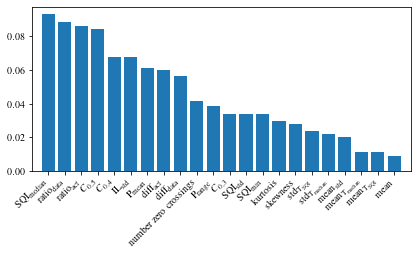

In [6]:
importances = models['RF_Clf_s10_h10'].clf.model.feature_importances_
column_names_text = models['RF_Clf_s10_h10'].features.columns
columns = models['RF_Clf_s10_h10'].features.copy()
columns.columns = [name.replace("_", " ") for name in columns.columns]
columns.rename(columns=get_latex_column_names(), inplace=True)
columns = columns.columns
indices = np.argsort(importances)[::-1]
for f in range(len(columns)):
    print("%2d) %-*s %f" % (f + 1, 30,column_names_text[indices[f]], importances[indices[f]]))
plt.figure(figsize=utils.get_plt_big_size())
plt.bar(range(len(columns)), importances[indices], align='center')
plt.xticks(range(len(columns)), [name.replace("_", " ") for name in columns[indices]], fontsize=10, rotation=45, ha="right")
plt.xlim([-1, len(columns)])
plt.tight_layout()
plt.savefig(os.path.join(utils.get_thesis_pic_path(),'rf-clf-final-importances.pdf'), bbox_inches='tight',
                transparent=True, dpi=300)

 1) sqi_coverage_05                0.334965
 2) hf_ratio_data                  0.085660
 3) sqi_median                     0.055613
 4) hf_diff_data                   0.054916
 5) peak_mean                      0.051114
 6) number_zero_crossings          0.048434
 7) hf_ratio_acf                   0.044534
 8) interval_lengths_std           0.038069
 9) hf_diff_acf                    0.034932
10) sqi_coverage_03                0.027535
11) kurtosis                       0.026661
12) skewness                       0.024312
13) peak_range                     0.022482
14) sqi_coverage_04                0.019568
15) sqi_min                        0.019385
16) sqi_std                        0.019190
17) template_corr_highest_sqi_std  0.017606
18) template_corr_median_sqi_std   0.016515
19) interval_means_std             0.016239
20) template_corr_highest_sqi_mean 0.015188
21) template_corr_median_sqi_mean  0.014086
22) mean                           0.012994


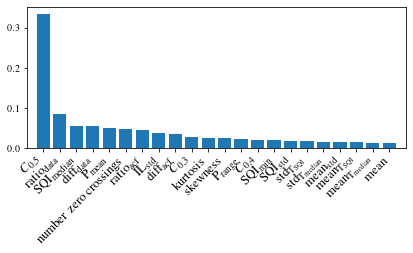

In [7]:
importances = models['XGB_Clf_s10_default_h10'].clf.model.feature_importances_
column_names_text = models['XGB_Clf_s10_default_h10'].features.columns
columns = models['XGB_Clf_s10_default_h10'].features.copy()
columns.columns = [name.replace("_", " ") for name in columns.columns]
columns.rename(columns=get_latex_column_names(), inplace=True)
columns = columns.columns
indices = np.argsort(importances)[::-1]
for f in range(len(columns)):
    print("%2d) %-*s %f" % (f + 1, 30,column_names_text[indices[f]], importances[indices[f]]))
plt.figure(figsize=utils.get_plt_big_size())
plt.bar(range(len(columns)), importances[indices], align='center')
plt.xticks(range(len(columns)), [name.replace("_", " ") for name in columns[indices]], fontsize=13, rotation=45, ha="right")
plt.xlim([-1, len(columns)])
plt.tight_layout()
plt.savefig(os.path.join(utils.get_thesis_pic_path(),'xgb-clf-final-importances.pdf'), bbox_inches='tight',
                transparent=True, dpi=300)

 1) sqi_coverage_05                0.293791
 2) hf_ratio_data                  0.173970
 3) hf_diff_data                   0.063522
 4) number_zero_crossings          0.059106
 5) hf_ratio_acf                   0.058975
 6) sqi_median                     0.052760
 7) peak_mean                      0.049717
 8) hf_diff_acf                    0.036321
 9) interval_lengths_std           0.030483
10) kurtosis                       0.021943
11) sqi_coverage_03                0.021831
12) peak_range                     0.019050
13) sqi_min                        0.015955
14) skewness                       0.015790
15) sqi_std                        0.013877
16) template_corr_highest_sqi_std  0.013156
17) sqi_coverage_04                0.012745
18) template_corr_median_sqi_std   0.010679
19) interval_means_std             0.010557
20) template_corr_highest_sqi_mean 0.009726
21) template_corr_median_sqi_mean  0.008676
22) mean                           0.007368


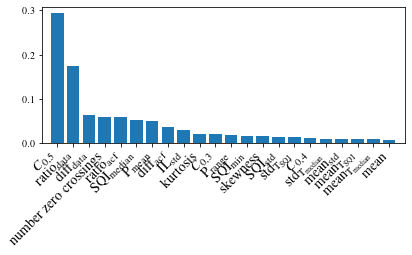

In [8]:
importances = models['XGB_Regr_s10_default_h10'].clf.model.model.feature_importances_
column_names_text = models['XGB_Regr_s10_default_h10'].features.columns
columns = models['XGB_Regr_s10_default_h10'].features.copy()
columns.columns = [name.replace("_", " ") for name in columns.columns]
columns.rename(columns=get_latex_column_names(), inplace=True)
columns = columns.columns
indices = np.argsort(importances)[::-1]
for f in range(len(columns)):
    print("%2d) %-*s %f" % (f + 1, 30,column_names_text[indices[f]], importances[indices[f]]))
plt.figure(figsize=utils.get_plt_big_size())
plt.bar(range(len(columns)), importances[indices], align='center')
plt.xticks(range(len(columns)), [name.replace("_", " ") for name in columns[indices]], fontsize=14, rotation=45, ha="right")
plt.xlim([-1, len(columns)])
plt.tight_layout()
plt.savefig(os.path.join(utils.get_thesis_pic_path(),'xgb-regr-final-importances.pdf'), bbox_inches='tight',
                transparent=True, dpi=300)

 1) hf_ratio_data                  0.107997
 2) hf_ratio_acf                   0.100100
 3) sqi_median                     0.094038
 4) interval_lengths_std           0.070631
 5) hf_diff_acf                    0.065980
 6) sqi_coverage_05                0.064354
 7) hf_diff_data                   0.064050
 8) number_zero_crossings          0.059168
 9) peak_mean                      0.057247
10) sqi_coverage_04                0.052544
11) peak_range                     0.032507
12) sqi_min                        0.032498
13) sqi_coverage_03                0.032302
14) sqi_std                        0.028609
15) kurtosis                       0.026061
16) template_corr_highest_sqi_std  0.022663
17) interval_means_std             0.022008
18) skewness                       0.021274
19) template_corr_median_sqi_std   0.018460
20) template_corr_highest_sqi_mean 0.010291
21) template_corr_median_sqi_mean  0.009133
22) mean                           0.008084


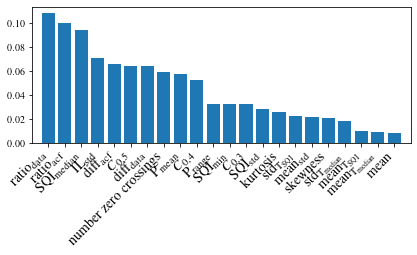

In [9]:
importances = models['RF_Regr_s10_h10'].clf.model.model.feature_importances_
column_names_text = models['RF_Regr_s10_h10'].features.columns
columns = models['RF_Regr_s10_h10'].features.copy()
columns.columns = [name.replace("_", " ") for name in columns.columns]
columns.rename(columns=get_latex_column_names(), inplace=True)
columns = columns.columns
indices = np.argsort(importances)[::-1]
for f in range(len(columns)):
    print("%2d) %-*s %f" % (f + 1, 30,column_names_text[indices[f]], importances[indices[f]]))
width, height = utils.get_plt_big_size()
plt.figure(figsize=(width, height))
plt.bar(range(len(columns)), importances[indices], align='center')
plt.xticks(range(len(columns)), [name.replace("_", " ") for name in columns[indices]], fontsize=14, rotation=45, ha="right")
plt.xlim([-1, len(columns)])
plt.tight_layout()
plt.savefig(os.path.join(utils.get_thesis_pic_path(),'rf-regr-final-importances.pdf'), bbox_inches='tight',
                transparent=True, dpi=300)

AUC: 0.75
F1-Score: 0.64

 Testset insgesamt
Fehler < 5 FE   : 32.61 %
Fehler < 10 FE   : 43.21 %
Fehler < 15 FE   : 51.64 %
Fehler < 20 FE   : 59.38 %
Fehler = 667 FE : 0.09578 %
                 precision    recall  f1-score   support

non-informative       0.73      0.69      0.71    144087
    informative       0.62      0.66      0.64    109616

       accuracy                           0.68    253703
      macro avg       0.68      0.68      0.68    253703
   weighted avg       0.68      0.68      0.68    253703

MAE insgesamt:  21.85 +- 30.48
MAE auf als informativ klassifizierten Segmenten: 12.52 +- 15.92
MAE auf als informativ annotierten Segmenten:  3.28 +- 2.65
MSE auf als informativ klassifizierten Segmenten: 410.13
MSE auf als informativ annotierten Segmenten:  17.80
MSE insgesamt:  1406.50


Coverage klassifiziert      : 46.05 %
Coverage annotiert          : 43.21 %

 Coverage bestimmter Fehler des genutzten Signals auf Gesamtsignal
Fehler < 5 FE gesamt           : 32.61 

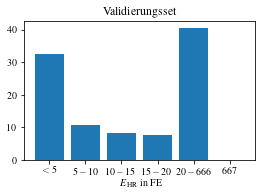

<Figure size 297.644x183.958 with 0 Axes>

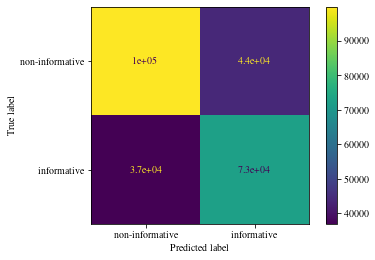

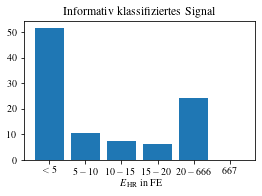

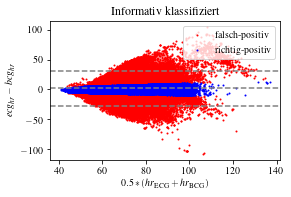

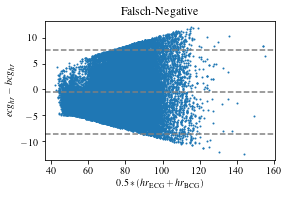

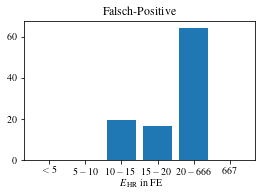

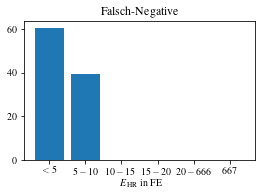

In [10]:
models['RF_Regr_s10_h10'].print_model_test_report("rf-own-final-10")